# Arrays, plotting and loops
--------------------------------------------------------------------------------------------------------------------------------

In this notebook, you will learn about:
 - [arrays](#Arrays) using __*NumPy*__ (installed by default in Anaconda),
 - [data plotting](#Data-plotting) using the module __*Matplotlib*__ (installed by default in Anaconda),
 - and the use of [loops](#Loops) to carry out a "large" number of computations with varying parameters.

## Arrays

What is an array?

According to Wikipedia an [array](https://en.wikipedia.org/wiki/Array_(data_structure)):
> "*is a data structure consisting of a collection of elements (values or variables), of same memory size, each identified by at least one array index or key.*"

This is shown on a graphical form in the figure below.
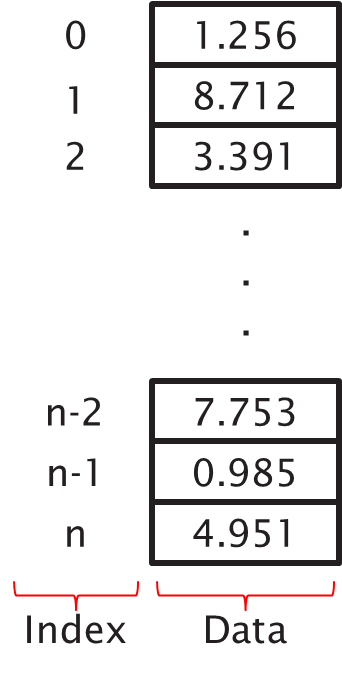
Note that while the index is always of *integer* type, the data can be either of *integer* or *real/float* type.

In both __*Python*__ and __*NumPy*__, the index of an array always starts at zero.

Next, let's create an array using the __*NumPy*__ method __*array*__ (a [method](https://en.wikipedia.org/wiki/Method_(computer_programming)) is a function that belongs to a [class](https://en.wikipedia.org/wiki/Class_(computer_programming))). To do this, you need to complete the following steps: 
 1. Import the __*NumPy*__ library. This is usually done by using an "alias" for __*NumPy*__ to make it easier and quicker to use it. We will use the "alias" __*np*__.

In [2]:
import numpy as np

 2. Create an array using __*np.array*__. As mentioned above, __*np.array*__ is basically a function, as such it requires a set of inputs to produce an output. For more information on the different inputs that __*np.array*__ accepts and the various ways in which it can be used visit the [__*numpy.array*__ reference page ](https://numpy.org/doc/stable/reference/generated/numpy.array.html)
 
 For this example, we will provide a set of values to that form the elements of the array. 

In [3]:
my_array = np.array([0.25,1.56,5.2,3.2,5.8])
print(my_array)

[0.25 1.56 5.2  3.2  5.8 ]


As mentioned above, in __*NumPy*__, the index of an array always starts at zero. So, to retrieve the value of the 2nd element you would need to access index 1, for the 3rd element you would need to access index 2 and so on.

Below you can find an illustrtive example.

In [4]:
elem = 0
print("The value of element number {} in the array is: {:.3f}".format(elem,my_array[elem]))
elem = 3
print("The value of element number {} in the array is: {:.3f}".format(elem,my_array[elem]))

The value of element number 0 in the array is: 0.250
The value of element number 3 in the array is: 3.200


When __*NumPy*__ arrays are created, several auxiliary functions/methods are made available. This can be useful when dealing with a large number of elements.

For instance, if the array is numeric, you can request for the maximum/minimum values in the array using the methods: __*max()*__ and __*min()*__. Below you can find an example of how to do this.

In [5]:
print("The max. value in the array is: {:.3f}".format(my_array.max()))
print("The min. value in the array is: {:.3f}".format(my_array.min()))

The max. value in the array is: 5.800
The min. value in the array is: 0.250


### Additional material to cover on your own and at your own pace

You might want to continue exploring some of the embedded functions/methods that are available whe working with __*NumPy*__ arrays. I suggest trying the following:
- retrieving the mean/average value of the elements in the array,
- retrieving the standard deviation value of the elements in the array,
- accessing a custom range of elements (e.g., more than more element at a time).

# Data plotting



We will use __*Matplotlib*__ for plotting data, it is a really powerful library. [__*Matplotlib*__ website](https://matplotlib.org/) states:
> "*Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.*"

In the website you can find out more about __*Matplotlib*__, its capabilities, as well as useful examples and tutorials. 

In this notebook, we will use an aircraft's lift and drag force dependance on flight speed as an example to understand the use of __*Matplotlib*__. Recall that the aircraft's lift and drag equations are given by:
$$
L = \frac{1}{2} \rho V^2 S C_L\\
D = \frac{1}{2} \rho V^2 S C_D
$$
where $L$ is the lift force, $D$ is the drag force, $\rho$ is the air density, $V$ is the flight speed, $S$ is the aircraft's wing reference area, $C_L$ is the lift force coefficient and $C_D$ is the drag force coefficient.

The code below defines two functions to compute these forces.

In [29]:
def compute_lift_force(V, S, CL, rho):
    
    # Lift force computation
    L = 1/2*(rho*V**2*S*CL)
    
    # Return result
    return L

def compute_drag_force(V, S, CD, rho):
    
    # Drag force computation
    D = 1/2*(rho*V**2*S*CD)
    
    # Return result
    return D

The functions above require $V$, $S$, $\rho$, $C_L$ and $C_D$ as inputs. Let's define these below.

In [7]:
# Physical constants
g = 9.81    # Earth's gravitational acceleration, [m/s^2]
rho = 1.225 # Air density at mean sea level, [kg/m^3]

# Aircraft's wing geometric characteristics
b = 1.8        # Wing span, [m]
AR = 8.2       # Wing aspect ratio
S = (b**2)/AR  # Wing reference area, [m^2]

# Aircraft's mass, [kg]
m = 2.5
# Compute aircraft's weight [N]
W = m*g

# Aircraft's flight speed, m/s
V = 18

# Aircraft's lift and drag coefficients
CL = W/(0.5*rho*(V**2)*S)
CD = 0.099

Now, let's create an array __*velocity_array*__ containing 7 values for $V$, ranging from $8\, m/s$ to $32\, m/s$ in steps of $4\, m/s$.

In [8]:
velocity_array = np.array([8,12,16,20,24,28,32])

Now using the lift and drag functions defined above, let's compute corresponding lift and drag force arrays.

In [9]:
# Compute lift force array
lift_force_array = compute_lift_force(velocity_array, S, CL, rho)
# Compute drag force array
drag_force_array = compute_drag_force(velocity_array, S, CD, rho)
# Print results to screen
print("The computed lift force array is {} N".format(lift_force_array))
print("The computed drag force array is {} N".format(drag_force_array))

The computed lift force array is [ 4.84444444 10.9        19.37777778 30.27777778 43.6        59.34444444
 77.51111111] N
The computed drag force array is [ 1.53338927  3.45012585  6.13355707  9.58368293 13.80050341 18.78401854
 24.53422829] N


Next, let's plot the change in lift and drag force using the __*Matplotlib*__ method __*pyplot*__. To do this, you need to complete the following steps:
 1. From the __*Matplotlib*__ library, import __*pyplot*__. We will use the "alias" __*plt*__.

In [10]:
import matplotlib.pyplot as plt

 2. Minimal set of instructions. Let's start by creating a basic plot of the lift force $L$ against the flight speed $V$. Only three instructions/methods are necessary:
     - __*plt.figure*__, used to create a figure object;
     - __*plt.plot()*__, used to plot an set of x/y data points against each other;
     - and __*plt.show()*__, used to display all open figures.

For more information on the different inputs that __*plt.plot*__ accepts and the various ways in which it can be used visit the [__*matplotlib.pyplot.plot*__ reference page ](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

The code below shows how to generate the $L$ vs $V$ plot.

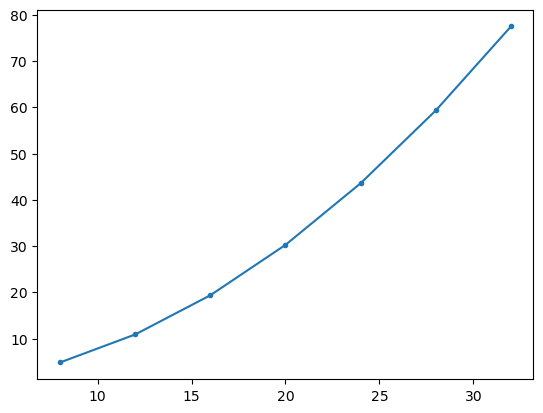

In [11]:
# Create a figure object
plt.figure
# Plot the lift_force_array points against the velocity_array points
#   Note that the '.-' input is a shorthand command that defines:
#     - the marker line as a bullet/dot ('.'),
#     - and the line type as continuos ('-').
plt.plot(velocity_array,lift_force_array,'.-')
# Display all open figures
plt.show()

3. Adding a grid. It's always a good idea to add a grid in the plot to make it easier to read data out of it. This is easily done by adding the instuction __*plt.grid()*__. The code below shows an example of this.

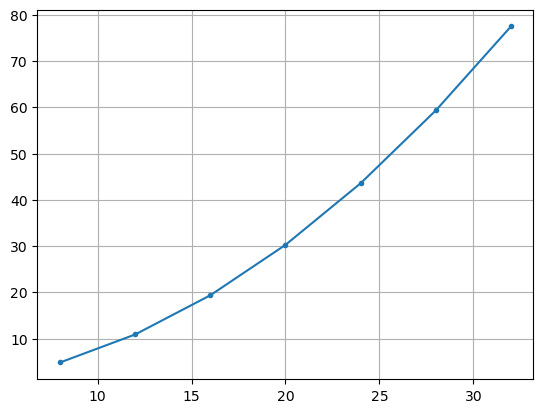

In [12]:
plt.figure
plt.plot(velocity_array,lift_force_array,'.-')
# Add grid to plot
plt.grid()
plt.show()

 4. Adding the plot for drag force. Now, let's add the drag force $D$ against the flight speed $V$ plot on top of the previous plot.

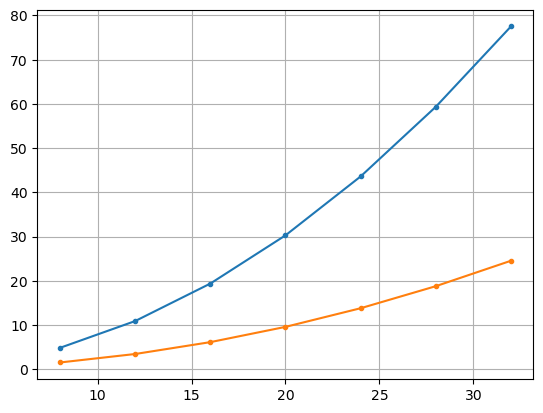

In [13]:
plt.figure
plt.plot(velocity_array,lift_force_array,'.-')
# Add the drag_force_array points against the velocity_array points 
plt.plot(velocity_array,drag_force_array,'.-')
plt.grid()
plt.show()

The above graph would be difficult to interpret for someone other that the person(s) generating it. For instance, if you are given only the graph above, how could you tell between the lift force and the drag force curves?

 5. Adding a legend. The simplest way to clearly identify which curve represents either lift force or drag force is to include a legend in the plot. This is achieved by adding:
   - a label input to __*plt.plot*__,
   - and the __*plt.legend()*__ instruction.

The code below shows how to do just that.

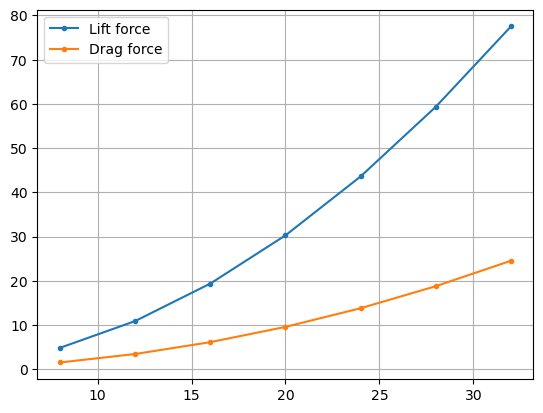

In [14]:
plt.figure
# Add a label for the lift_force_array plot
plt.plot(velocity_array,lift_force_array,'.-',label="Lift force")
# Add a label for the drag_force_array plot
plt.plot(velocity_array,drag_force_array,'.-',label="Drag force")
# Add a legend to the plot
plt.legend()
plt.grid()
plt.show()

The above graph is now easier to interpret. However, for the graph above, how could you tell which axis corresponds to the lift/drag force and which one corresponds to the flight speed? Also, which are the units of measurement?
 
 6. Adding a label for the X-axis. Adding a descriptive label to the X-axis with the right information would address this questions.
 
 The code below shows how to generate the X-axis label.

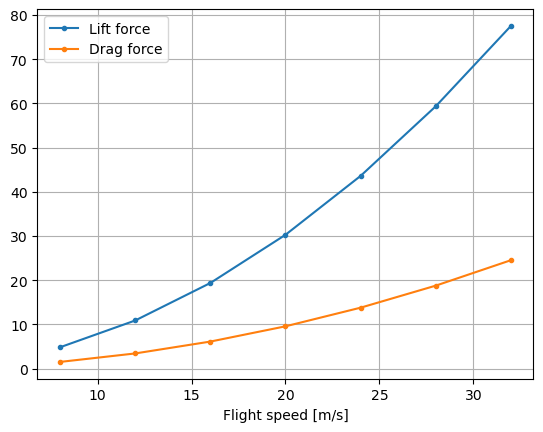

In [15]:
plt.figure
plt.plot(velocity_array,lift_force_array,'.-',label="Lift force")
plt.plot(velocity_array,drag_force_array,'.-',label="Drag force")
# Add a X-axis label
plt.xlabel("Flight speed [m/s]")
plt.legend()
plt.grid()
plt.show()

 7. Adding a label for the Y-axis. In a similar fashion you can add a label to the Y-axis.

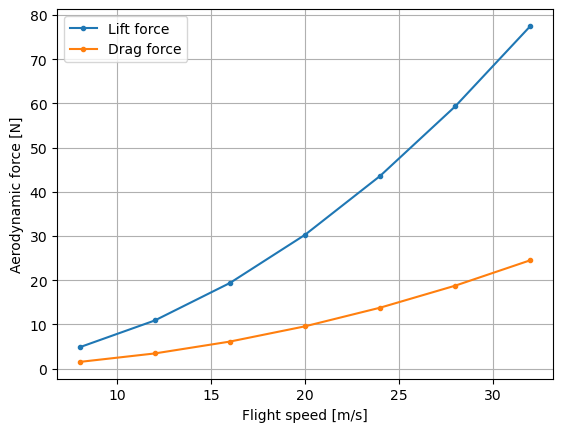

In [16]:
plt.figure
plt.plot(velocity_array,lift_force_array,'.-',label="Lift force")
plt.plot(velocity_array,drag_force_array,'.-',label="Drag force")
plt.xlabel("Flight speed [m/s]")
# Add a Y-axis label
plt.ylabel("Aerodynamic force [N]")
plt.legend()
plt.grid()
plt.show()

Now, when comparing the resulting plot/graph above witht the initial one, you can see that the final graph presents the data in a clearer, more accesible, more professional and easier to read fashion. 

### Additional material to cover on your own and at your own pace

You might want to continue exploring some of the embedded functions/methods that are available whe working with __*Matplotlib*__. I suggest trying the following:
- change the marker type used for the lift and drag forces (e.g., a star for lift and a cross for the drag),
- change the line style/colour used for the lift and drag forces (e.g., interrupted line for lift/dotted line for the drag, black colour line for lift/ red colour line for drag),
- change the plot limits of the X/Y-axes.

# Loops

What is a loop?

A loop is a set of instructions that is repeatedly executed until a logical condition is met. A loop usually has five main elements:
1. a counter, which keeps track of the number of iterations/times the loop has been executed;
2. a counter start, which defines the value the counter starts counting from;
3. a counter increment/decrement, which defines whether the counter is increased or decreased after each iteration step and by how much (e.g., increament by 1 unit, decrement by 2 units);
4. a condition, which define the logical condition that needs to be met to stop/exit the loop;
5. and a set of instructions to be executed.

A graphical representation of this is shown in the diagrma below.
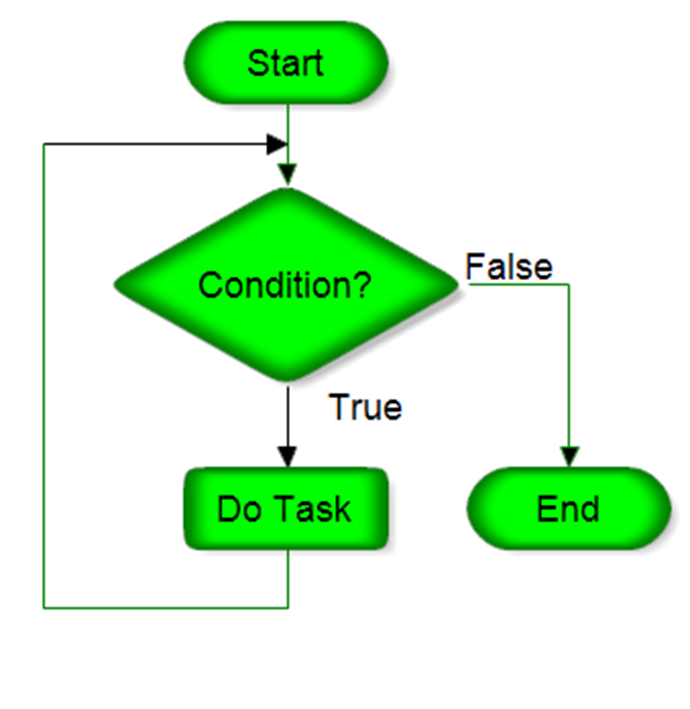
Diagram credit: __RFF Electronics__ https://www.rff.com/structured_flowchart.php

For the examples in this notebook, we will use [for-loops](https://en.wikipedia.org/wiki/For_loop).

In the example code below, a loop is run for 15 steps/iterations. On each iteration, the value of the __elem__ variable is printed to screen.

In [17]:
for elem in range(0,15):
    print(elem)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


The five main elements in the loop above are: 
- counter -> __*elem*__,
- counter start -> __*elem = 0*__,
- counter increment -> in Python this is implicitly defined and equal to 1,
- condition, __*elem < 15*__ (the loop stops once __*elem*__ reaches a value equal to 15),
- and set of instructions -> the is only one instruction __*print(elem)*__.

Now, let's look at an example of using a loop to carry out a "large" number of computations.

We will expand the lift and drag forces example. First, we need to create three "placeholder" arrays, each with 100 elements and filled with zeros. Doing this is more memory efficient than creating elements dynamically.

In [18]:
# Create flight speed, lift force and drag force arrays with each with 100 elements and filled with zeros
V_large_array = np.zeros((100,))
Lift_large_array = np.zeros((100,))
Drag_large_array = np.zeros((100,))

Now, let's define the initial, end and step values for the flight speed in the computations.

In [20]:
# Number of elements 
elem_number = 100
# Initial flight speed value
init_value = 10
# End flight speed value
end_value  = 60
# Flight speed step value
step = (end_value-init_value)/(elem_number-1)
# Print result
print("The flight speed initial, end and step values are: {:.2f}, {:.2f} and {:.2f} m/s, respectively".format(init_value,end_value,step))

The flight speed initial, end and step values are: 10.00, 60.00 and 0.51 m/s, respectively


Then, let's use a loop to compute 100 different values for the lift and drag forces using the flight speed range and step defined above.

In this case, the counter, counter start and counter increment remain the same. The remaining two elements in the loop are:
- condition, __*elem < elem_number*__ (the loop stops once __*elem*__ reaches a value equal to elem_number = 100),
- and set of instructions -> the isntructions to compute the lift and drag forces, as well as to update/increase the value of the flight speed

The code below show how to implemetn this.

In [23]:
# Set the initial value (index/elem = 0) equal to init_value
V_large_array[0] = init_value
# Execute instruction in a loop
for elem in range(0,elem_number):
    
    ## Set of instructions to repeatedly execute
    # Compute lift force for value V_large_array[elem], and store it in Lift_large_array[elem]
    Lift_large_array[elem] = compute_lift_force(V_large_array[elem], S, CL, rho)
    # Compute drag force for value V_large_array[elem], and store it in Drag_large_array[elem]
    Drag_large_array[elem] = compute_drag_force(V_large_array[elem], S, CD, rho)
    # Verify that elem < (elem_number-1), this ensures that the code doesn't try to access
    #    an element that doesn't exist, e.g., elem = 100, elem = 101, elem = 102
    if elem < (elem_number-1):
        # Increase V value for next computation step
        V_large_array[elem+1] = V_large_array[elem] +step

We can verify that loop results by printing the flight speed and lift force arrays values to screen.

In [25]:
print("The values in the flight speed array are: \n{}".format(V_large_array))
print("\nThe values in the lift force array are: \n{}".format(Lift_large_array))

The values in the flight speed array are: 
[10.         10.50505051 11.01010101 11.51515152 12.02020202 12.52525253
 13.03030303 13.53535354 14.04040404 14.54545455 15.05050505 15.55555556
 16.06060606 16.56565657 17.07070707 17.57575758 18.08080808 18.58585859
 19.09090909 19.5959596  20.1010101  20.60606061 21.11111111 21.61616162
 22.12121212 22.62626263 23.13131313 23.63636364 24.14141414 24.64646465
 25.15151515 25.65656566 26.16161616 26.66666667 27.17171717 27.67676768
 28.18181818 28.68686869 29.19191919 29.6969697  30.2020202  30.70707071
 31.21212121 31.71717172 32.22222222 32.72727273 33.23232323 33.73737374
 34.24242424 34.74747475 35.25252525 35.75757576 36.26262626 36.76767677
 37.27272727 37.77777778 38.28282828 38.78787879 39.29292929 39.7979798
 40.3030303  40.80808081 41.31313131 41.81818182 42.32323232 42.82828283
 43.33333333 43.83838384 44.34343434 44.84848485 45.35353535 45.85858586
 46.36363636 46.86868687 47.37373737 47.87878788 48.38383838 48.88888889
 49.39393

Additionally, the last element in the lift force array is the max. value in the array, and it aligns with the max. value in the flight speed array (also the last element). This makes sense as the lift force changes with the square of flight speed.

In fact, both the lift force and drag force arrays reach a maximum value when the flight speed is maximum. For this example, the array's max. values are:

In [28]:
print("The max. value in the flight speed array is: {:.3f}".format(V_large_array.max()))
print("The max. value in the lift force array is: {:.3f}".format(Lift_large_array.max()))
print("The max. value in the drag force array is: {:.3f}".format(Drag_large_array.max()))

The max. value in the flight speed array is: 60.000
The max. value in the lift force array is: 272.500
The max. value in the drag force array is: 86.253


Next, we can plot the results using a slightly modified versionof the code written in the [data plotting](#Data-plotting) section.

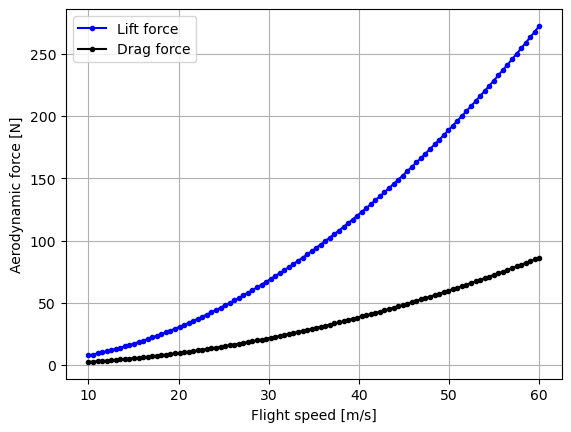

In [31]:
plt.figure()
plt.plot(V_large_array,Lift_large_array,'b.-',label='Lift force')
plt.plot(V_large_array,Drag_large_array,'k.-',label='Drag force')
plt.xlabel("Flight speed [m/s]")
plt.ylabel("Aerodynamic force [N]")
plt.legend()
plt.grid()
plt.show()

Lastly, by removing the markers we get a "cleaner" looking plot.

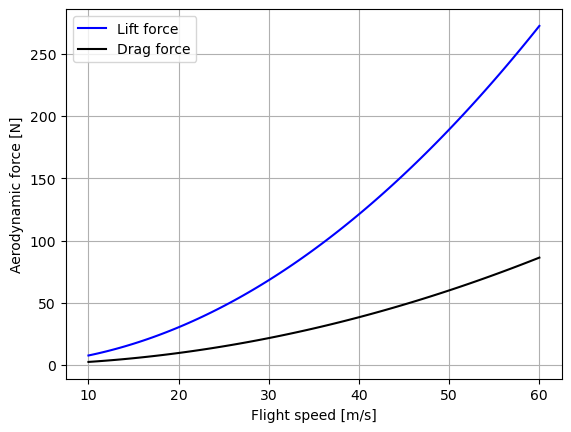

In [30]:
plt.figure()
plt.plot(V_large_array,Lift_large_array,'b-',label='Lift force')
plt.plot(V_large_array,Drag_large_array,'k-',label='Drag force')
plt.xlabel("Flight speed [m/s]")
plt.ylabel("Aerodynamic force [N]")
plt.legend()
plt.grid()
plt.show()